# Diabetes Prediction

## Import the libraries

In [15]:
import pandas as pd
import numpy as np

## Import the dataset

In [16]:
data = pd.read_csv('diabetes.csv')
X = data.drop(['Outcome'],axis=1)
y = data['Outcome']

In [17]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [18]:
from imblearn.combine import SMOTEENN
sn=SMOTEENN()
X,y=sn.fit_resample(X,y)

In [19]:
y.value_counts()

Outcome
1    303
0    228
Name: count, dtype: int64

## Splitting the dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

## Feature scaling

## Training the model

In [21]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')

classifier.fit(X_train,y_train)

SVC(kernel='linear')

## Predicting the results

In [22]:
y_pred = classifier.predict(X_test)

## Creating the confusion matrix and accuracy score

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[42  4]
 [ 3 58]]


0.9345794392523364

## Visualising the confusion matrix

<Axes: >

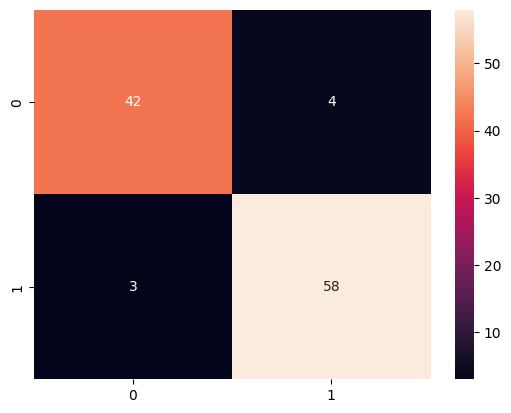

In [24]:
import seaborn as sns
sns.heatmap(cm, annot=True)

## Predicting a result

In [25]:
input = (5,166,72,19,175,25.8,0.587,51)
input = np.asarray(input).reshape(1,-1)
prediction = classifier.predict(input)

c:\Users\veera\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [26]:
if prediction[0]==0:
    print('The person is non-diabetic.')
else:
    print('The person is diabetic.')

The person is diabetic.


## Deployment

### Saving the trained model

In [27]:
import pickle
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

### Loading the saved model

In [28]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

### Changing the classifier into pickle loaded model

In [29]:
input = (5,166,72,19,175,25.8,0.587,51)
input = np.asarray(input).reshape(1,-1)
prediction = loaded_model.predict(input)

if prediction[0]==0:
    print('The person is non-diabetic.')
else:
    print('The person is diabetic.')

The person is diabetic.


c:\Users\veera\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
